In [1]:
from PIL import Image as img
import numpy as np
import cv2
import matplotlib.pyplot as plt
lena=img.open('lena.bmp')
lena_arr = np.asarray(lena)

In [2]:
def expan_zero(arr):
    m=len(arr)
    n=len(arr[0])
    res=res=[[0]*(n+2) for i in range(m+2)]
    for i in range(1,m+1):
        for j in range(1,n+1):
            res[i][j]=arr[i-1][j-1]
    return res
def h(b,c,d,e):
    if b!=c:
        return 's'
    else:
        if d==b and e==b:
            return 'r'
        else:
            return 'q'
def f(a1,a2,a3,a4):
    if a1=='r' and a2=='r'and a3=='r'and a4=='r':
        return 5
    tmp=0
    if a1=='q':
        tmp+=1
    if a2=='q':
        tmp+=1
    if a3=='q':
        tmp+=1
    if a4=='q':
        tmp+=1
    return tmp

In [42]:
def yokoi(lena):
    m=len(lena)
    n=len(lena[0])
    arr=[[0]*(m//8) for i in range(n//8)]
    res=[[0]*(m//8) for i in range(n//8)]
    for i in range(m//8):
        for j in range(n//8):
            arr[i][j] = lena[8*i][8*j]
    m=len(arr)
    n=len(arr[0])
    arr=expan_zero(arr)
    
    for i in range(m):
        for j in range(n):
            a1=h(arr[i+1][j+1],arr[i+1][j+2],arr[i][j+2],arr[i][j+1])
            a2=h(arr[i+1][j+1],arr[i][j+1],arr[i][j],arr[i+1][j])
            a3=h(arr[i+1][j+1],arr[i+1][j],arr[i+2][j],arr[i+2][j+1])
            a4=h(arr[i+1][j+1],arr[i+2][j+1],arr[i+2][j+2],arr[i+1][j+2])
            
            tmp=f(a1,a2,a3,a4)
            if tmp and arr[i+1][j+1]:
                print(tmp,end='')
                res[i][j]=tmp
            else:
                print(' ',end='')
        print('')
    return res
    
    

In [43]:
res=yokoi(lena_arr//128)

11111111        12111111111122322221     111111111111           
15555551         115555555511 2 11  11   1155555555511          
15555551        1 2115555112  21112221    155555555551      21  
15555551        1 2 155112 22221511       1555555555511     1   
15555551         22 2112 22    121        15555555555511        
15555551         1  2  21 2     1   1     15555555555551        
15555551           12 1  121111    1321   155555555555511       
15111551           1322 1155551111        155555555555551       
111 1551            1  121555555511       155555555555511       
11  1551                 21155555511      15511155555511        
21  1551                 2 15555555111    1551 11555511         
1   1551                 2 155555555511   1551  115551         1
    1551               1121155555555551   1551   15511        12
    1551               15555555555555511  1551   1111        111
    1551        1     2221155555555555511 1151    11        1151
    1551        2    22 1

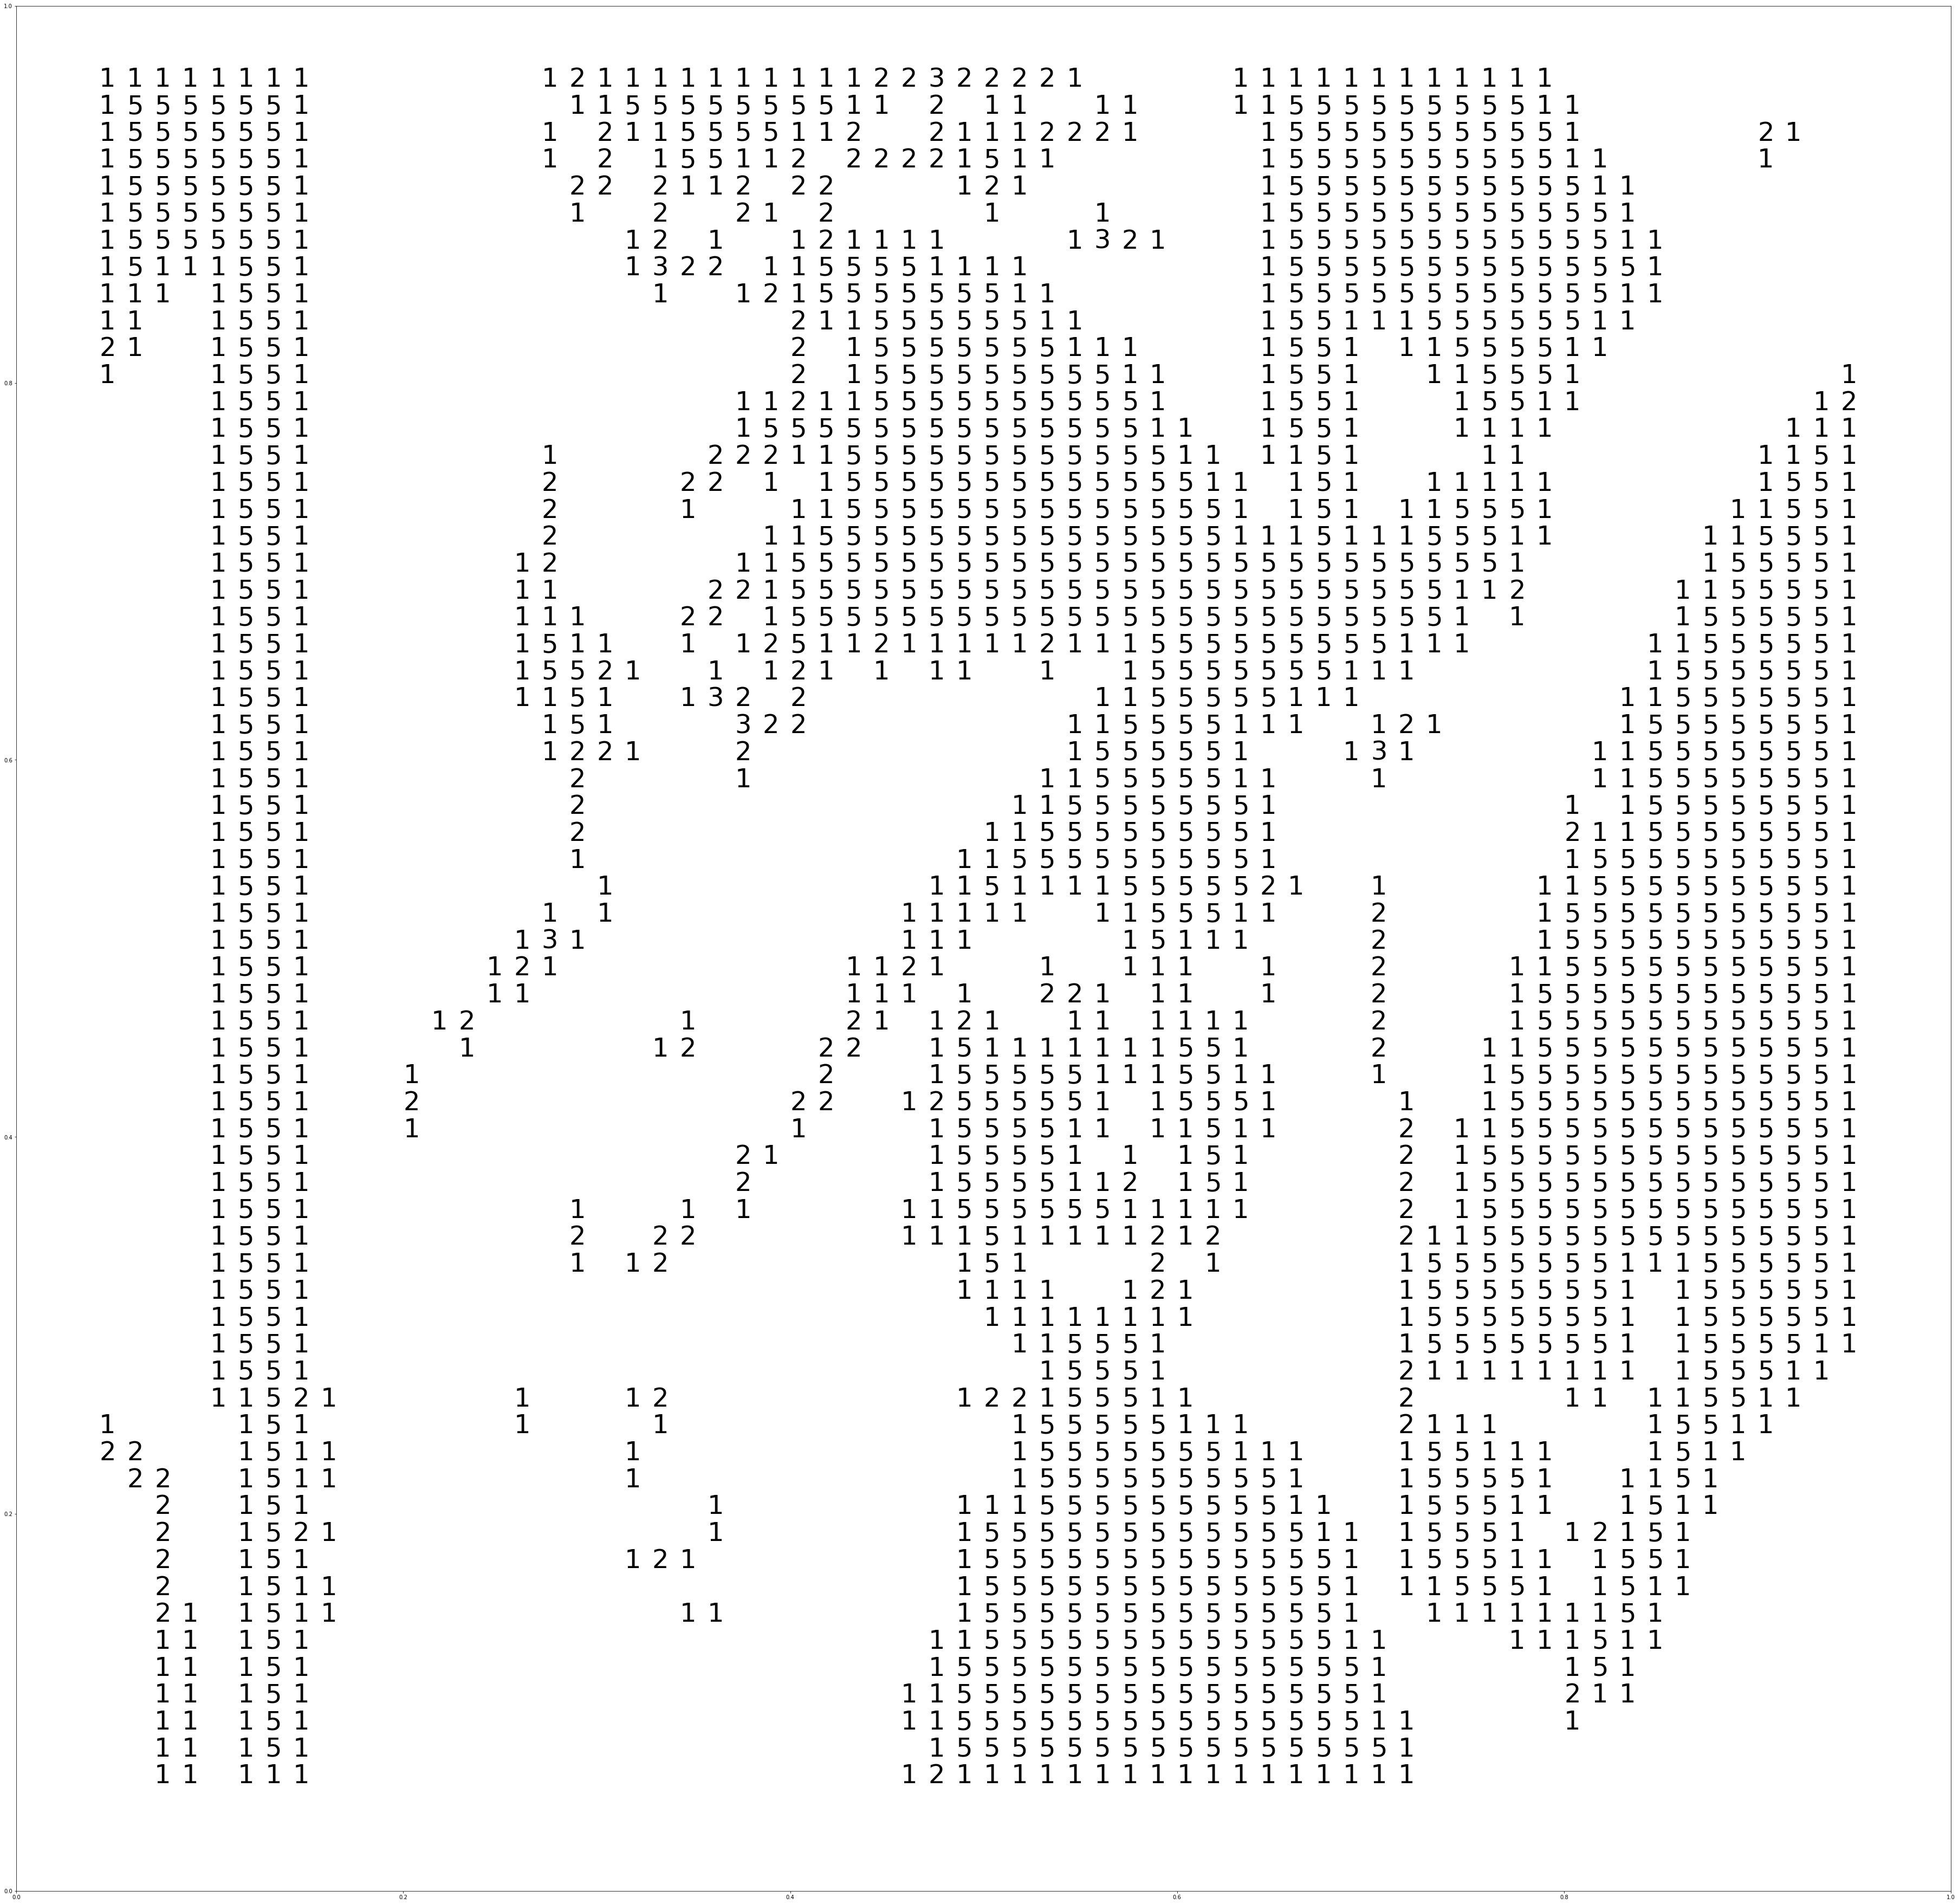

In [49]:
plt.figure(figsize=(64,64))
for i in range(64):
    for j in range(64):
        if res[i][j]:
            plt.text((j+3)/70,(67-i)/70,str(res[i][j]),fontsize=48)
plt.show()